### Import your librares

In [25]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


### Load your dataset

In [26]:
Data = pd.read_csv('C:/Users/alsow/Downloads/seattle_weather.csv')

In [27]:
Data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [29]:
Data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


### Handle missing data in PRCP and RAIN columns

In [30]:
Data.isnull().sum()


DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [31]:
Data.var()

PRCP      0.057136
TMAX    163.149112
TMIN     79.082528
RAIN      0.244629
dtype: float64

In [43]:
Data['RAIN'].fillna(False, inplace=True)

In [44]:
Data['PRCP'].fillna(Data['PRCP'].mean(), inplace=True)

In [45]:
Data.var()

PRCP      0.057129
TMAX    163.149112
TMIN     79.082528
RAIN      0.244622
dtype: float64

In [46]:
Data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


### PRCP column 

<Axes: >

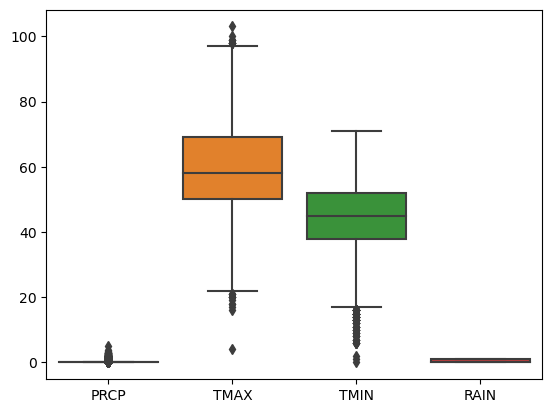

In [47]:
sns.boxplot(Data)
#It contains an outliers!  

In [48]:
Data['PRCP'].var()

0.057129329674218

In [49]:
Q1 = np.percentile(Data['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(Data['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


In [50]:
Data =Data.drop(Data[(Data['PRCP'] > 0.25) | (Data['PRCP'] < -0.15000000000000002)].index)


<Axes: >

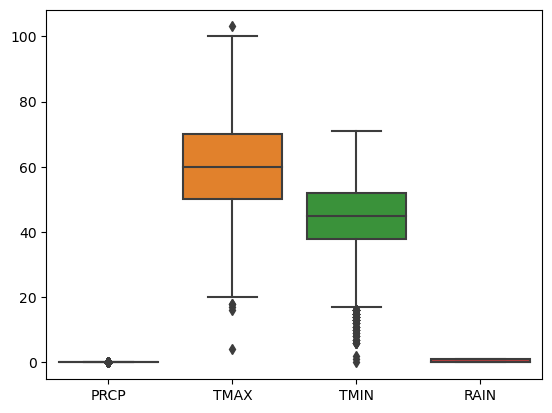

In [51]:
sns.boxplot(Data)

In [52]:
Data['PRCP'].var()

0.0035053326619171174

### TMAX column 

<Axes: >

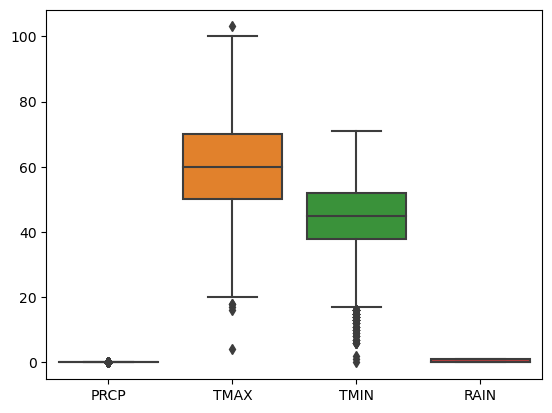

In [53]:
sns.boxplot(Data)
#It contains outliers.

In [54]:
Q1 = np.percentile(Data['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(Data['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers: ', Q1 - 1.5*(IQR))
print('higher bound outliers: ', Q3 + 1.5*(IQR))

lower bound outliers:  20.0
higher bound outliers:  100.0


In [55]:
Data['TMAX'].var()

171.83233013705564

In [56]:
Data =Data.drop(Data[(Data['TMAX'] < 20.0) | (Data['TMAX'] > 100.0)].index)


<Axes: >

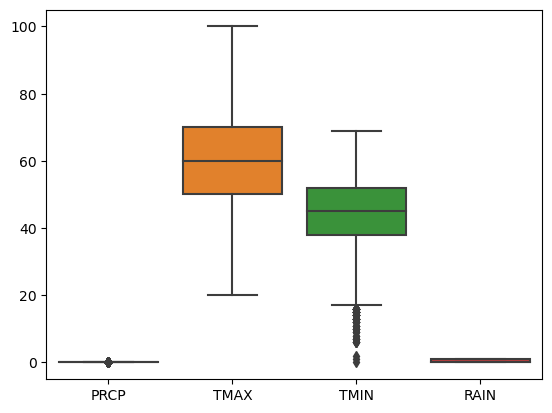

In [57]:
sns.boxplot(Data)

In [58]:
Data['TMAX'].var()

171.30866601950316

### TMIN column 

<Axes: >

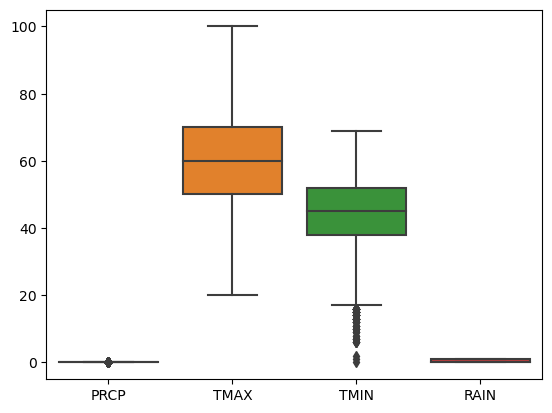

In [59]:
sns.boxplot(Data)


In [62]:
Data['TMIN'].var()

83.77171157070468

In [63]:
Q1 = np.percentile(Data['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(Data['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers: ', Q1 - 1.5*(IQR))
print('higher bound outliers: ', Q3 + 1.5*(IQR))

lower bound outliers:  17.0
higher bound outliers:  73.0


In [64]:
Data =Data.drop(Data[(Data['TMIN'] < 17.0) | (Data['TMIN'] > 73.0)].index)


<Axes: >

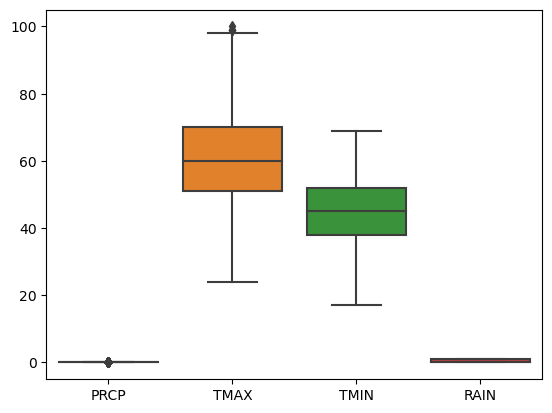

In [65]:
sns.boxplot(Data)


In [66]:
Data['TMIN'].var()

80.00529863798968

array([[<Axes: title={'center': 'PRCP'}>,
        <Axes: title={'center': 'TMAX'}>],
       [<Axes: title={'center': 'TMIN'}>, <Axes: >]], dtype=object)

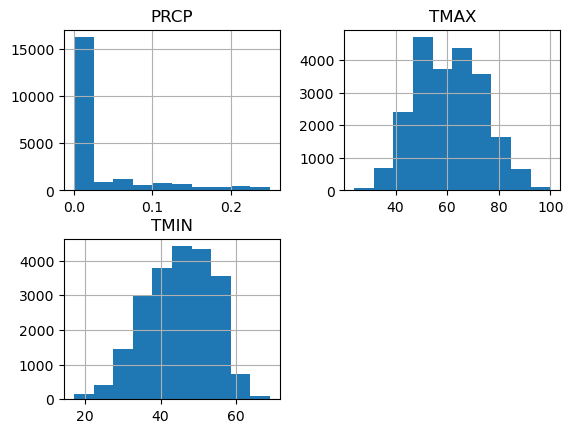

In [67]:
Data.hist()